# Arboles y Bosques aleatorios

Un arbol es una estructura que se puede utilizar para establecer un conjunto de reglas de desicion ya que se puede representar de forma visual el conjunto de reglas a seguir. La estructura básica de un arbol de desición es un conjunto de nodos, ramas y hojas.

El punto donde se origina el arbol se llama **nodo raíz**. Y un nodo que no tiene ni una rama que no tenga ni una rama ni hoja que siga se llama un **nodo hoja**. Tipicamente un arbol de desición comenzará con un nodo raíz, seguira con un conjunto de nodos de decisión y terminará en un conjunto de nodos terminales o nodos hoja, donde la regla de desición final será llevada a cabo y por lo tanto haremos una clasificación. A excepción del nodo terminal, todos los nodos representan una única variable y cada una de las ramas cada una de las posibles categorias o los posible valores que puede tomar esta variable. Estos pueden tratase de categorias, o puede tratarse de condiciones. Finalmente el **nodo terminal**, representa la deisción final que hace el algoritmo y por lo tanto el valor que va a devolver al final de la ejecución el arbol de desición.

- Nodo Raiz: Nodo inicial de donde nace el arbol de desición.
- Rama: Es una conexión entre dos nodos donde se establece una condición para seguir la ejecución a la hojas.
- Hoja: Es un nodo que no tiene una ramificación o mas nodos que se conecten a el. 
- Nodo terminal: Un conjunto de hojas que serán utilizados por el modelo para tomar una desición final.

Un ejemplo de su utilización es por ejemplo:

Imaginemos un dataset que tienen datos sobre las observaciones que permiten determinar cual será el rendimiento de determinada cosecha. Tenemos como variables la lluvia, terreno, fertilizantes, aguas subterraneas, rendimiento de la cosecha.

Si lo vemos intuitivamente podemos saber cual es la relación de las variables con el rendimiento de la cosecha. Y venir con una forma de clasificar cuales son las zonas que tienen distintos rendimientos con la cosecha. Pero con una cantidad de datos reducida, generar un algoritmo para determinar que factores ayudan a una cosecha a mano, puede ser complicado incluso en 20 observaciones, en millones de observaciones puede ser peor.

## Matematicas de un árbol de desición

El objetivo global de un arbol de desición es establecer una clasficación lo mas homogenea posible en lo que se trata de referenciarse a la variable objetivo.

Una distribución homogenea significa que valores similares de la variable objetivo deben ser agrupados conjuntamente de modo que una desición concreta pueda ser llevada a cabo. No hay que exagerar en explotar un arbol que tenga muchas ramas, si no que el objetivo es agrupar ramas similares en una distribución homogenea. 

Repecto al ejemplo anterior, de las cuatro variables para predecir, bucamos el parámetro que nos de una distribución mas homogenea posible de la variable a predecir. En este caso el nivel de fertilidad para los terrenos en ésta categoria. Uno puede llevar a cabo el conteo de cuantos hay de cada tipo en el dataset. 

En este caso tenemos 3 tipos de predicciónes, cosecha moderada, optimo y pobre. Para crear el arbol vamos a hacer el conteo de parámetros y como estos afectan a la homogeneidad de la variable objetivo a predecir. 

En este caso se pueden hacer tablas de frecuencia para calcular la homogeneidad de cada variable respecto a la variable objetivo, si nos detenemos a mirar los datos entonces nos podemos dar cuenta de la homogeneidad de las variables. 

La homogeneidad significa que las cosas que se agrupan conjuntamente, deben quedar juntas y las disimilares tienen que alejarse las unas de las otras. 

## Entropia y Ganancia de información 

La entropia es una tecnica que usa la teoria de la información, la premisa es que mientras mas homogeneos son los puntos del arbol, se requiere menos información para representarlos. Un ejemplo de información donde se utiliza el concepto de entropia, es cuando queremos encriptar una señal para ser trasmitida. Si los elementos que contrituyen el mensaje son muy homogeneos, en general se consumiran menos bits para llevar a cabo la transmisión. La configuración que requiere menos información es la preferida y es dehecho como funcionan algoritmos de compresión como RAR y ZIP.

En nuestro caso la heterogeneidad de un no do se puede representar con la entropia. La interpretación para la entropia, o la cantidad de información necesaria para codificar para codificar una determinada codificación de un miembro de un conjunto fijado a priorí. En cambio cualquier variación de una entropia de un modo no deseable se medirá como una ganancia de información.

En el contexto de un arbol de desición, los nodos que cuando los añadimos como resultado resultan como mayor gasto de información del arbol pues se añaden a la configuración. 

La entropia tiene una definición sencilla:

$$
H(S) = \sum\limits^{n}_{i=1}{-p_i log_2(p_i)}
$$

La suma de todos los posibles valores de la variable objetivo con una probabilidad $p_i$. Se define la entropia de ese conjunto como, el sumatorio de la probabilidad negativa por el logaritmo binario de dicha probabilidad. El base dos por supuesto es una reminicencia que representa que codificamos 0's y 1's en variables binarias. 

A persar del signo $-$ la entropia siempre es positiva debido a que la probabilidad por el logaritmo siempre será un valor negativo, por lo tanto el valor sera positivo al final. 

De aqui se deduce una cosa y es que la entropia, tendrá como posibles valores cualquier número desde cero al logaritmo en base dos de $c$ o el número de categorias presentes en la variable objetivo.

- La entropia sería cero si todas las variables son perfectamente homogeneas.
- Y cuando fuera heterogeneas se tomaria el valor máximo es decir, cuando todos las probabilidades son iguales.

Si una de las probabilidades es igual a 1 entonces significa que esa categoria se lleva la clasificación, el receptor de información sabe como clasificar cualquier miembro arbitrario porque todos pertenecen a la misma categoria. 

Recuperando el ejemplo anterior, teniamos 3 tipos de cosechas y calculamos la probabilidad de cada uno. Suponiendo que tenemos 20 datos, y 4 datos optimos, 9 medios y 7 pobres, tonces las probabilidades son:

$$
\begin{align}
p_o &= \frac{4}{20} \\
p_m &= \frac{9}{20} \\
p_o &= \frac{7}{20} \\
\\
    H(S) &= -\frac{4}{20} \cdot log_2 \frac{4}{20} - \frac{9}{20} \cdot log_2 \frac{9}{20} - \frac{7}{20} \cdot log_2 \frac{7}{20} = 1.5
\end{align}
$$

## Ganancia de información

La ganancia de información se verá reducida si introducimos información al sistema, y el objetivo es reducir la entropia, esta reducción se refleja en el indice de **ganancia de información**, la definición de la ganancia de información es:

$$
\Delta H(S, V) = H(S) - \sum\limits_{c \in V}{\frac{|V = c|}{|V|}H(V=c)}
$$

Es decir la entropia original en un nodo concreto o el sistema completo y a partir de aqui elegimos una variable $v$ que puede tomar cualquier valor y le restamos el sumatorio sobre todas las categorias que puede tomar la variable $v$, la proporción del número de datos donde la variable $v$ toma la categoria $c$ sobre la proporcion total de los valores, por lo tanto, el número total de observaciones de $c$, en la variable nodo de decisición por el número total de observaciones por la entropia calculada sobre el conjunto de puntos donde el valor de la categoria es $c$.

## Algoritmo $ID_3$

Para evitar el overfitting y que cada variable tenga una rama, y tambien para evitar que el arbol crezca infinitamente, podemos definir un limite de profundidad. O el número minimo de observaciones que queremos que tenga un nodo para dividirlo. De modo a que si se alcanza la profundidad máxima quedará un nodo hoja que no sea homogeneo, pero al menos no procederemos a tener problema de overfitting.

El algoritmo que usa la ganancia y entropia de información se llama $ID_3$. Queremos minimizar la entropia en base a divisiones.

La variable que aporta la **mayor cantidad de información** es la que será incluida **para tomar una desición**.

1. Primero calculamos la entropia inicial del sistema basandonos en la **variable objetivo** a predecir.
2. Calculamos la ganancia de información para cada **variable candidata** para un *nodo*. Seleccionamos la variable que nos da **máxima ganancia de información** como *nodo de desición*.
3. Repetimos el paso 2 para cada *rama* (valor) de cada *nodo* (variable candidata). El nuevo *nodo* es un *nodo hoja*.
4. Comprobamos si el *nodo* hoja clasifica correctamente todos los datos. Si es así paramos con esa rama. Si no es así volvemos al paso 2 e iteramos para ramificarlo.

Otros algoritmos son:
- GINI: El indice GINI es para calcular categorias binarias. Es la suma de los cuadrados de las proporciones para cada variable.
- CHAID (detector automatico de la varianza): 
- Reducción de la varianza: Se usa cuando la variable objetivo es continua. En el metodo la variable objetivo  es una variable númerica continua, Luego se calcula el promedio en el nodo raíz, luego se calcula la varianza en el nodo raíz, La varianza en los elementos en la categoria 1 y 2, y luego se obtiene la varianza ponderada tomando las varianzas anteriores y multiplicando por la probabilidad de encontrarse en cada categoria. La que tiene la menor varianza ponderada es la que se elige como nodo de desición.

## La poda del arbol

Los arboles de desición pueden seguir creciendo hasta tener problemas de overfitting. Mientras mas pequeño el arbol se decrece en precisión pero la generalización aumenta considerablemente. 

La estrategia mas común para evitar el sobreajuste en los arboles de desición, es permitir que el arbol crezca hasta que los nodos tengan un número minimo de instancias dentro de ellos, y luego proceder a elminiar del arbol las ramas o nodos que no nos proporcionan mucho poder de clasificación en el mismo. éste proceso se llama "La poda del árbol" y se puede hacer de abajo hacia arriba o de arriba abajo. Un método clasico, es la reducción del error en la poda. 

Simplemente se toman todos los nodos principales, es un método de poda bastante sencillo y que no tiene complicación. Simplemente se toman todos y cada uno de los nodos terminales, y reemplazammos cada nodo por la categoria mas popular de la que tenga. 

Tambien existe la poda en el coste de complejidad. Se trata de generar subconjuntos de arboles, donde $t_0$ es un arbol sin podar, y $t_n$, sería un arbol solo con un nodo raíz. entonces un nodo se crea reemplazando un nodo $t_i-1$ con uno de los nodos hoja, seleccionando el nodo hoja con alguno de los algoritmos que vimos anteriormente. 

La poda de complejidad se describe por los pasos:
1. Definir la tasa de error para un árbol T en un dataset D err(T, D).
2. El número de nodos terminales en el árbol viene dado por leaves(T). Denotamos por prune(T, t) el subarbol t que resulta de recortar el árbol T.
3. Definimos la función M como el cociente:
$$
M = \frac{err(prune(T, t), D) - err(T, D)}{|leaves(T)| - |leaves(prune(T, t))}
$$

4. Calculamos M para todos los subárboles T.
5. El subarbol que minimiza M se elige para ser eliminado del árbol original. 



## La variable númericas, contínuas o NAs

Los problemas que pueden surgir al tener variables continuas o NAs. 

- Variables continuas: En el caso de tener variables continuas hay que encontrar umbrales optimas de corte para convertirlas en categoricas. El proceso a llevar a cabo para escoger las categorias, puede ser extraer la columna predictora y la columna continua y fijarnos en las variables. Cuando haya un cambio en la variable objetivo con respecto a la predictora, podemos hacer un corte. y asi podemos definir los umbrales.
Este metodo funciona porque se calcula en relación al resultado. Es decir que tendrán relación por que si se mide en forma de cambios de una variable sobre otra, es decir que se toma en cuenta la influencia entre las dos variables. 

- NAs: Si tenemos NAs, la ventaja mas grande es que a la hora de que falte un valor de un atributo, se puede gestionar muy bien. En algoritmos de Arboles uno puede encontrarse con que falten puntos de los datos o coordenadas de los datos donde falta un atributo. Si alguno de los datos no esta disponible, lo que se puede hacer es asignar la categoria mas común respecto a la variable a predecir.   

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../datasets/iris/iris.csv")

data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
data.shape

(150, 5)

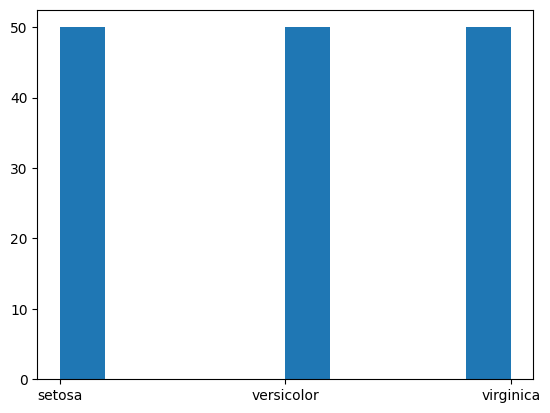

In [68]:
plt.hist(data["Species"])
plt.show()

In [69]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

data["is_train"] = np.random.uniform(0, 1, len(data)) <= 0.75

train, test = data[data["is_train"]==True], data[data["is_train"]==False]

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

preds = tree.predict(test[predictors])

pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predicciones"])

Predicciones,setosa,versicolor,virginica
Actual,,,
setosa,10,0,0
versicolor,0,10,2
virginica,0,0,15


In [70]:
tree.score(test[predictors], test[target])

0.9459459459459459

In [6]:
from sklearn.tree import export_graphviz

with open("resources/Arbol.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [7]:
import os
from graphviz import Source

file = open("resources/Arbol.dot", "r")
text = file.read()
file.close()



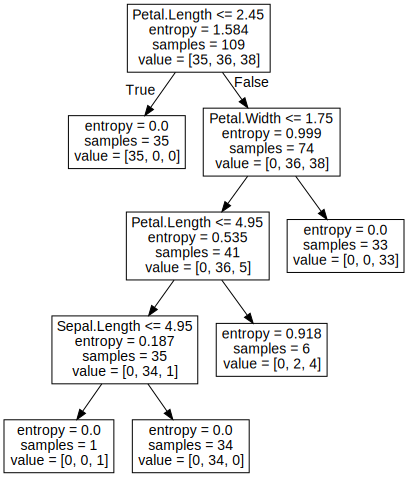

In [8]:
Source(text)



In [9]:
# Validación cruzada para la poda del árbol
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X = data[predictors]
Y = data[target]

tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X, Y)

cv = KFold(n_splits=10, shuffle=True, random_state=1)
score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1))

In [10]:
score

0.9333333333333333

Score con profundidad 1: 0.5666666666666667
Importancia de las variables: [0. 0. 1. 0.]

Score con profundidad 2: 0.9200000000000002
Importancia de las variables: [0.         0.         0.66620285 0.33379715]

Score con profundidad 3: 0.9400000000000001
Importancia de las variables: [0.         0.         0.68976981 0.31023019]

Score con profundidad 4: 0.9333333333333333
Importancia de las variables: [0.         0.         0.66869158 0.33130842]

Score con profundidad 5: 0.9333333333333333
Importancia de las variables: [0.         0.         0.66869158 0.33130842]

Score con profundidad 6: 0.9333333333333333
Importancia de las variables: [0.         0.         0.66869158 0.33130842]

Score con profundidad 7: 0.9333333333333333
Importancia de las variables: [0.         0.         0.66869158 0.33130842]

Score con profundidad 8: 0.9333333333333333
Importancia de las variables: [0.         0.         0.66869158 0.33130842]

Score con profundidad 9: 0.9333333333333333
Importancia de las v

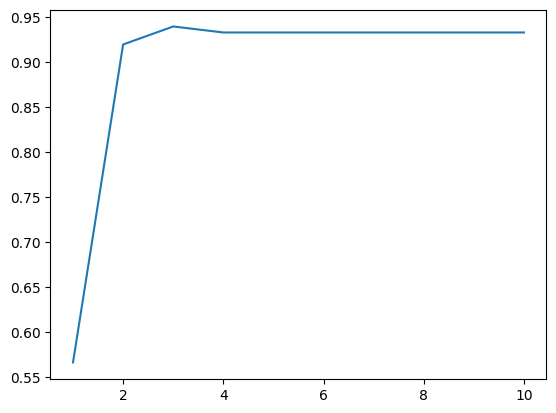

In [11]:
scores = []
for i in range(1, 11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X, Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)

    score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv=cv, n_jobs=1))
    print("Score con profundidad {}: {}".format(i, score))
    print("Importancia de las variables: {}".format(tree.feature_importances_), end="\n\n")

    scores.append(score)

plt.plot(range(1, 11), scores)

## Árbol de regresión 

La diferencia entre el arból de desición y el árbol de regresión es que, la variable objetivo en el caso del árbol de regresión, es una variable númerica continua. El algoritmo de un árbol de regresión resulta particulármente útil cuando existen multiples rasgos en el dataset de entrenamiento que interactuan entre ellos de un modo mas complejo que no sea el lineal o lógistico.

El algoritmo de un arbol de regresión resulta util cuando existen multiples **rasgos interactuan de un modo mas complejo que no sea el lineal o logistico**. En casos donde **no existen** relaciones lineales entre las variables y la salida, una alternativa podria ser dividir el dataset en pequeñas partciones locales, para que las interacciónes sean mucho mas manejables. Si yo voy partiendo los datos en subconjuntos hasta obtener una interacción que a penas sea no lineal o no se centre en las observaciones de la partición. Básicamente habria un momento que nos quedemos con un solo elemento en cada nodo o con observaciones homogeneas, esto se denomina una **partición recursiva**, sin embargo, el **arbol de regresión** es muy similar al arbol de desición, porque el algoritmo que se usa en escencia es el mismo.

En este caso se subdividen en nodos y la condición de parada es la profundidad. Sin embargo podemos utilizar el enfoque anterior y categorizarla en diferentes categorias usando el proceso visto en los arboles de desición. 

Los pasos del algoritmo de un arbol de regresión son:
1. Empezamos con un nodo con todas las observaciones
    - Calculamos la media y varianza de la variable objetivo.
2. Calculamos la reducción de varianza para todos los posibles candidatos a variable del siguiente nodo
3. Para cada nodo comprobamos si
    - La reducción de la varianza es menor que el umbral.
    - El número de observaciones en dicho nodo sea menor que otro umbral.


Ventajas del Árbol de desición:
    - Modela relaciones complejas no lineales.
    - Fácil de entender
    - Aunque falten valores, se puede promediar en el ultimo nodo donde se ha clasificado la observación.
    - Permiten seleccionar rasgos descriptivos importantes para el dataset.

In [10]:
# Árboles de regresión.
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
data.shape
# Crim: Es el porcentaje promedio per capita de criminales
# Zn: Proporcion de la zona residencial por 25ft^2
# indus: Porcentaje de industrias por la zona
# chas: Una variable dummy del rio Chas, si es 0 si esta lejos del rio y 1 si esta cerca
# rm: Promedio de habitaciones por casa
# age: Proporcion de unidades ocupadas antes de 1940
# dis: Distancia al centro de la ciudad
# rad: Indice de acceso a la carretera o pistas radiales
# ptratio: Proporcion de profesores/estudiantes en la ciudad
# black: Es la proporción de negros en la ciudad por cada 1000
# lstat: Es el porcentage de gente de bajo estatus en la población
# medv: Precio medio de la vivienda en miles de dolares



(506, 14)

Dispersión de los errores 3.5342069949784705
Media de los errores 4.2127039669571156e-16


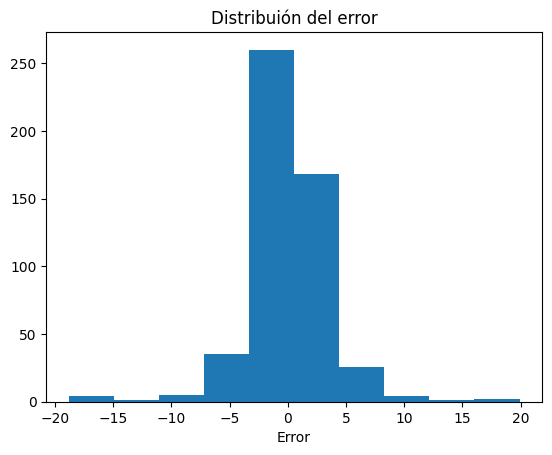

In [12]:
# Preprocesado
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]

X = data[predictors] # Usamos todos las columnas de predictores
Y = data[target] # Dejamos fuera la variable objetivo

# Arbol de regresión
from sklearn.tree import DecisionTreeRegressor

regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)
# Min samples split, es el número minimo de observaciones para que un nodo sea considerado para ser dividido
# Numero minimo de observaciones para clasificar un nodo como nodo hoja.
regtree.fit(X, Y)

preds = regtree.predict(data[predictors])

data["preds"] = preds
data['diff'] = data["preds"] - data["medv"]
data[['preds', 'medv', 'diff']]
print("Dispersión de los errores", data['diff'].std())
print("Media de los errores", data['diff'].mean())

plt.hist(data['diff'])
plt.title("Distribuión del error")
plt.xlabel("Error")
plt.show() # Errores normalmente distribuidos corresponden a una perturbación natural de los datos de entrada
# Todo bien hasta alli

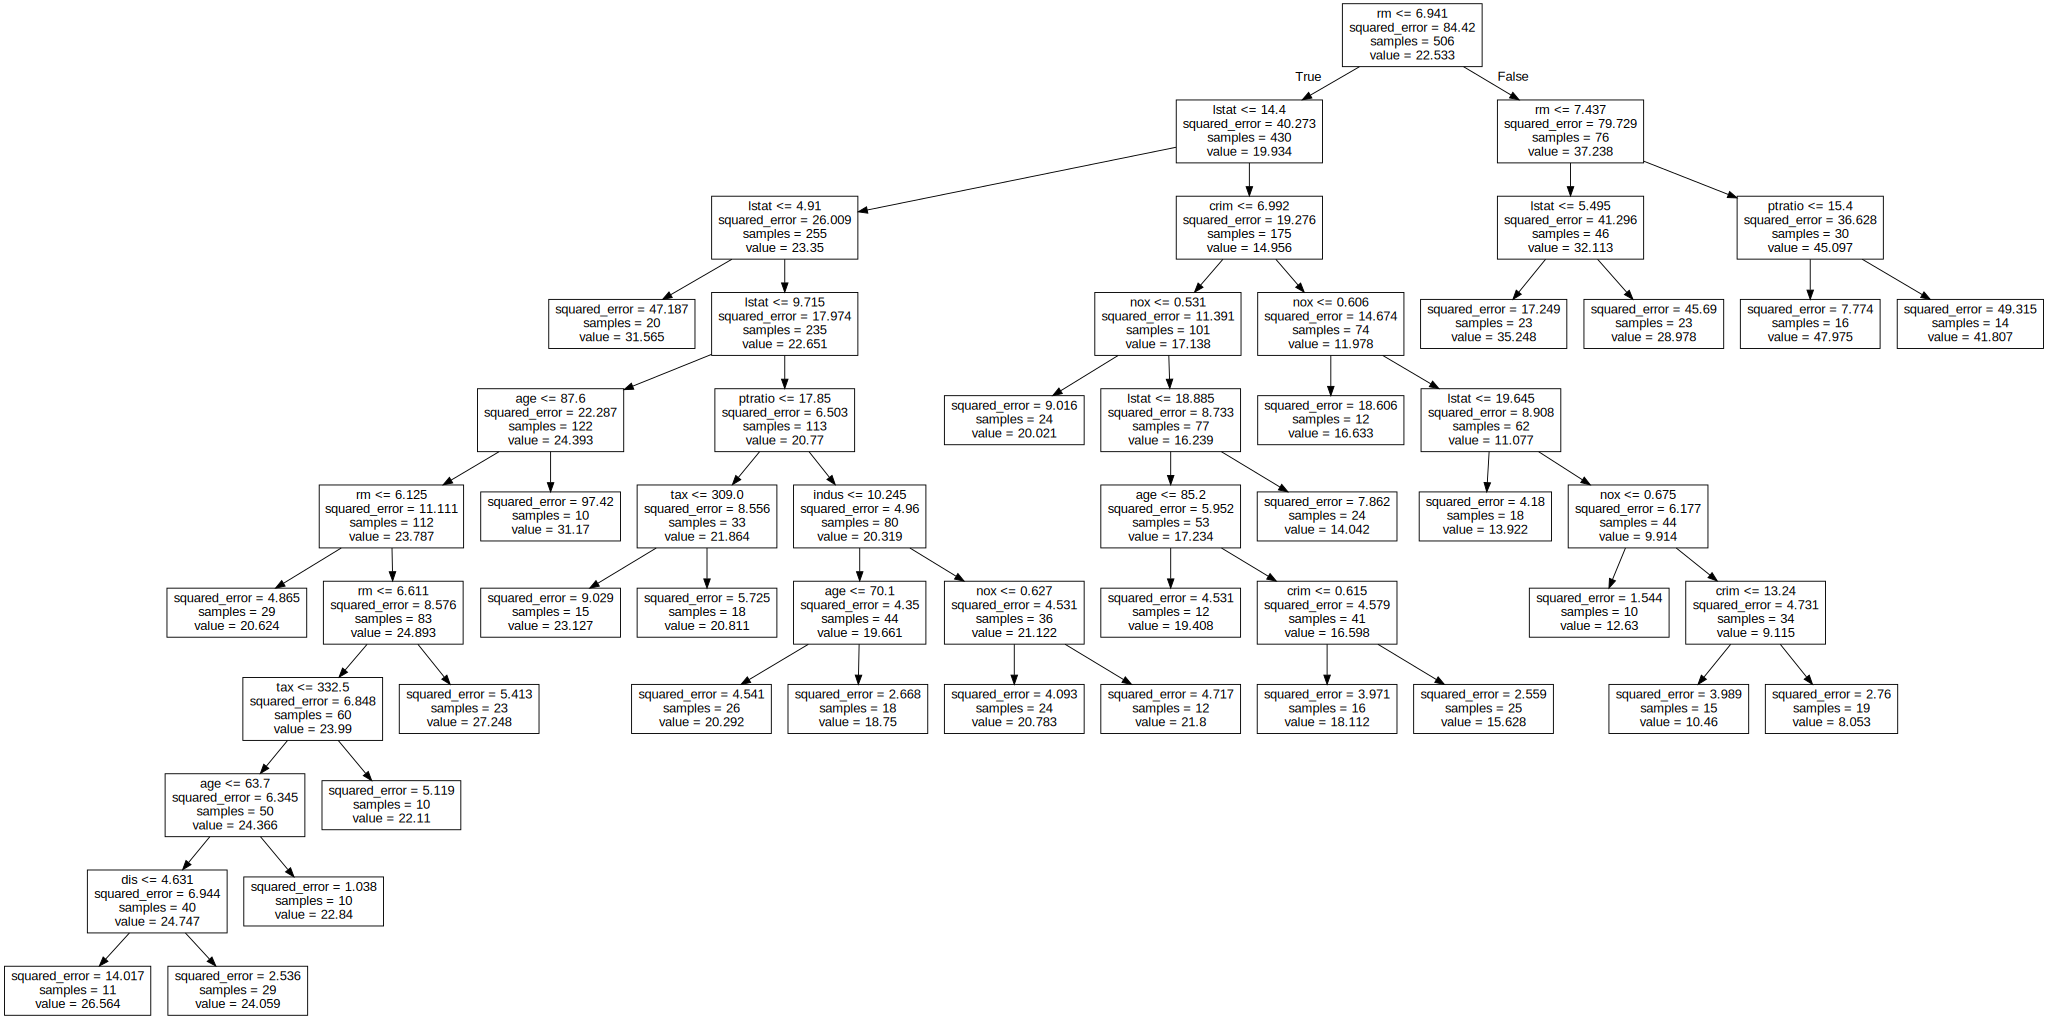

In [15]:
from sklearn.tree import export_graphviz
from graphviz import Source

p = "resources/Boston_Tree.dot"
with open(p, 'w+') as f:
    export_graphviz(regtree, out_file=f, feature_names=predictors)

file = open(p, "r")
text = file.read()
Source(text)

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import sklearn

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = np.mean(cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv=cv, n_jobs=1))

print("Scores:", scores)

Scores: -20.107307036443846


In [31]:

for i in  sklearn.metrics.get_scorer_names():
    if "error" in i:
        print(i)

max_error
neg_mean_absolute_error
neg_mean_absolute_percentage_error
neg_mean_squared_error
neg_mean_squared_log_error
neg_median_absolute_error
neg_root_mean_squared_error


In [35]:
sorted(list(zip(predictors, regtree.feature_importances_)), key=lambda x: x[1], reverse=True)

[('rm', 0.6308568014337028),
 ('lstat', 0.28488020584647283),
 ('crim', 0.03421203230639308),
 ('nox', 0.01856163073811432),
 ('age', 0.01725115143448847),
 ('ptratio', 0.009333247332530954),
 ('tax', 0.0023698305298803803),
 ('dis', 0.0013745115995791378),
 ('indus', 0.0011605887788380146),
 ('zn', 0.0),
 ('chas', 0.0),
 ('rad', 0.0),
 ('black', 0.0)]

In [40]:
from sklearn.model_selection import GridSearchCV
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0)

clf = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        'min_samples_split': list(range(1, 20, 1)),
        'min_samples_leaf': list(range(1, 20, 1)),
    }
)

clf.fit(X, Y)

c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 1805.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
95 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\Psyche\anaconda3\envs\ds\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "c:\Users\Psyche\anaconda3\en

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19]})

In [41]:
clf.best_estimator_

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=3)

In [42]:
clf.best_params_

{'min_samples_leaf': 4, 'min_samples_split': 3}

In [44]:
regtree = DecisionTreeRegressor(
    min_samples_split=clf.best_params_["min_samples_split"],
    min_samples_leaf=clf.best_params_["min_samples_leaf"],
    random_state=0
)

estimator = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring="neg_mean_squared_error", cv=estimator, n_jobs=1)
print("Scores:", scores)
print("Mean score", np.mean(scores))

Scores: [-14.30740412 -10.5799579  -10.07036896 -28.63744562  -7.07112572
 -28.03055623 -12.20012038 -20.10587887 -23.51855073  -9.6601056 ]
Mean score -16.418151413736602


In [45]:
clf.best_estimator_.score(X, Y)

0.9483838254117538

In [46]:
sorted(list(zip(predictors, clf.best_estimator_.feature_importances_)), key=lambda x: x[1], reverse=True)

[('rm', 0.5963251755812518),
 ('lstat', 0.22209100522179429),
 ('dis', 0.07379695392934964),
 ('crim', 0.03877074727922377),
 ('nox', 0.02967410908014546),
 ('ptratio', 0.013706285827953503),
 ('tax', 0.011869023901048558),
 ('age', 0.00923345989430156),
 ('black', 0.003696699322989879),
 ('indus', 0.0008229326956906168),
 ('zn', 1.3607266250997509e-05),
 ('chas', 0.0),
 ('rad', 0.0)]

## Random Forest

El random forest es un algoritmo predictivo de Machine Learning. Son algoritmos de aprendizaje por union, y consisten en una combinación de modelos independientes que pueden ser iguales o independientes para resolver una tarea particular. Y el resultado se calculara en cada uno de los modelos independientes y de algun modo se van a combinar para obtener un mejor resultado para cada uno de los modelos de manera independientes.

Random forest hace muchos arboles un bosque de arboles de desición y luego para dar una predicción se vota y gana la mayoria en el claso de clasificación o utilizando una media de todos los arboles del bosque en el caso de la regresión.

- Metodos de combinación de modelos (Ensemble): se crean varios modelos similares e independientes y se hace un promedio de las predicciónes de cada modelo
- Metodos de impulso (Boosting): reducir el sesgo del estimador combinandolo o construyendolo de forma suceción de los estimadores base. Asi conseguimos un modelo más robusto a partir de modelos mas debiles. 

Cualquier algoritmo de RandomForest se basa en crear arboles de manera aleatoria para poder combinar los resultados. Random Forest es una tecnica muy facil de entender e implementar y la ventaja es que no tiene muchos parámetros apra poder ocuparlo. 

- No necesita poda, ni validación cruzada debido a que usa el método de **bagging**:
    - Con $n$ observaciones del dataset de entrenamiento T y m variables. decidimos hacer crecer S árboles en nuestro bosque. Cada uno será creado con una parte del dataset de entrenamiento.
    - Las $n$ observaciones para cada dataset se toman aleatoriamente con reemplazo del dataset original.
    - Cada dataset puede tener observaciones duplicadas y algunas no aparecer como entrenamiento
    - Estos datasets se llaman muestras del boostrap o bolsas

El algoritmo funciona de modo que:

1. Se toma una muestra n del dataset con reemplazo.
2. Tomamos una muestra elatoria simple de variables sin reemplazo.
3. Construimos un árbol de regresión con los predictores elegidos en 2 y sin podar el árbol.
3. Clasificamos las observaciones fuera de la bolsa con dicho arbol y almacenamos el valor o la clase asignada a cada una.
4. repetimos los pasos 1 a 3 un numero largo de veces para obtener un bosque de arboles.
6. Promediamos las observaciones de todos los árboles o para la clasificación tomamos la clase con mayoria de votos en el conjunto de árboles.

In [62]:
# Random forest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X, Y)

# obb_score: Es para hacer un muestreo out of the box para hacer las predicciones


RandomForestRegressor(n_jobs=2, oob_score=True)

<Axes: >

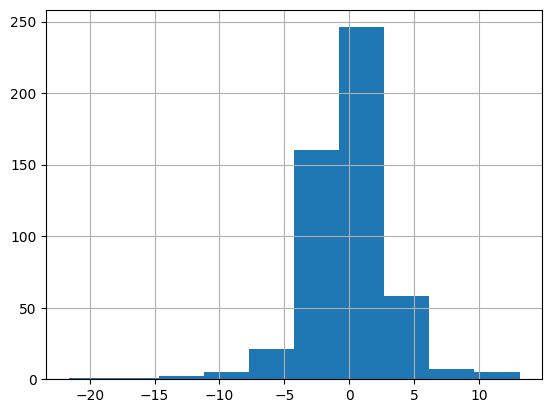

In [63]:
data['rforest_pred'] = forest.oob_prediction_
data[["rforest_pred", "medv"]]

# Residuos 
data["resid"] = data["medv"] - data["rforest_pred"]

data['resid'].hist()

In [64]:
data['rforest_error'] = (data['rforest_pred'] - data['medv']) ** 2

np.mean(data['rforest_error'])

10.178415226503772

In [65]:
forest.oob_score_

0.8794306000889772

In [78]:
from sklearn.preprocessing import LabelEncoder
clf = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=100)
Y = train[target]
Y = LabelEncoder().fit_transform(Y)
forest.fit(train[predictors], Y)

RandomForestRegressor(n_jobs=2, oob_score=True)

In [79]:
forest.oob_score_

0.9178943544812782

In [76]:
train

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True
6,4.6,3.4,1.4,0.3,setosa,True
...,...,...,...,...,...,...
143,6.8,3.2,5.9,2.3,virginica,True
144,6.7,3.3,5.7,2.5,virginica,True
145,6.7,3.0,5.2,2.3,virginica,True
147,6.5,3.0,5.2,2.0,virginica,True


## ¿Porque que funcionan los random forest?

Los Random forest parecen tener una mejor predicción a través de promediar resultados o el voto por mayoria. ¿Pero por que funciona?. 

Mientras mas modelos se toman en consideración apra una predicción se máximiza la reducción de la varianza. Esto es porque se generan muchos modelos distintos e independientes y al ser distintos los mejores compensan en error a los perores. Es la forma mas óptima de utilizar las variales del Dataset. En la mayoria de los algoritmos de Machine Learning, seleccionamos las mejores variables para predecir. Pero en el caso de un random forest, la selección es aleatoria asi que los valores resultantes se calculan en base a particiones locales. 

En contra tambien hay que resaltar que los parámetros son muy importantes. Algunos de los parámentros mas importantes para los bosques aleatorios son:

- Tamaño del nodo (min_samples_left)
- Número de árboles (n_estimators)
- Número de predictores muestreados

